## 4.1 確認資料

In [1]:
# 取得中文字型
!wget 'https://github.com/flyingpath/electron-hand-dicom/raw/master/TaipeiSansTCBeta-Regular.ttf'

--2021-11-11 03:35:52--  https://github.com/flyingpath/electron-hand-dicom/raw/master/TaipeiSansTCBeta-Regular.ttf
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/flyingpath/electron-hand-dicom/master/TaipeiSansTCBeta-Regular.ttf [following]
--2021-11-11 03:35:53--  https://raw.githubusercontent.com/flyingpath/electron-hand-dicom/master/TaipeiSansTCBeta-Regular.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M   114MB/s    in 0.2s    

2021-11-11 03:35:55 

In [2]:
# 共通事前處理

# 隱藏不必要的警告
import warnings
warnings.filterwarnings('ignore')

# 匯入必要的函式庫
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

# 將字型新增到 matplotlib
fm.fontManager.addfont('./TaipeiSansTCBeta-Regular.ttf')

# 用來顯示資料框的函式
from IPython.display import display

# 調整顯示選項
# NumPy 的浮點數表示精度
np.set_printoptions(suppress=True, precision=4)

# pandas 中的浮點數表示精度
pd.options.display.float_format = '{:.4f}'.format

# 顯示資料框中的所有項目
pd.set_option("display.max_columns",None)

# 指定圖形的預設字體大小
plt.rcParams["font.size"] = 14

# 指定圖形的預設字型
plt.rcParams['font.family'] = 'Taipei Sans TC Beta'

# 隨機種子
random_seed = 123

### 4.1.1　數值上與統計上的分析法

#### 載入鐵達尼號資料集

#### 鐵達尼號資料集的各項目

**生還** (survival) : （0 = 死亡、1 = 生還）     
**艙等** (pclass) : （1 = 1 等艙、2 = 2 等艙、3 = 3 等艙）  
**性別** (sex) :  （male = 男性、female = 女性）  
**年齡** (age)  
**手足與配偶數** (sibsp) : 同乘的兄弟姊妹與配偶數   
**父母與子女數** (parch) : 同乘的父母與子女數  
**票價** (fare)  
**乘船港代碼**(embarked) :    
(C=Cherbourg、Q=Queenstown、S=Southampton)   
**艙等名** (class) : （First = 1 等艙、Second = 2 等艙、Third = 3 等艙）  
**男女兒童** (who) : （man = 男性、woman = 女性、child = 兒童）  
**成人男子** (adult_male):  True / False  
**甲板** (deck):  房艙號碼首字母（A 到 G）  
**乘船港** (embark_town) : Southampton/Cherbourg/Queenstown  
**生還與否** (alive): yes / no   
**單身** (alone): True / False  

In [3]:
# 匯入追加的函式庫
import seaborn as sns

# 載入範例資料
df_titanic = sns.load_dataset("titanic")

# 項目名稱中文化
columns_t = ['生還', '艙等', '性別', '年齡', '手足與配偶數', 
             '父母與子女數', '票價', '乘船港代碼', '艙等名', 
             '男女兒童', '成人男子', '甲板', '乘船港', '生還與否', '單身']
df_titanic.columns = columns_t

# 資料內容
display(df_titanic.head())

,生還,艙等,性別,年齡,手足與配偶數,父母與子女數,票價,乘船港代碼,艙等名,男女兒童,成人男子,甲板,乘船港,生還與否,單身
0,0,3,male,22.0000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### 確認各項目的缺失值

In [4]:
print(df_titanic.isnull().sum())

生還          0
艙等          0
性別          0
年齡        177
手足與配偶數      0
父母與子女數      0
票價          0
乘船港代碼       2
艙等名         0
男女兒童        0
成人男子        0
甲板        688
乘船港         2
生還與否        0
單身          0
dtype: int64


#### 確認各特定項目的項目值

In [5]:
# 「乘船港」項目中各項目值之個數
print(df_titanic['乘船港'].value_counts())
print()

# 「生還與否」項目中各項目值之個數
print(df_titanic['生還與否'].value_counts())

Southampton    644
Cherbourg      168
Queenstown      77
Name: 乘船港, dtype: int64

no     549
yes    342
Name: 生還與否, dtype: int64


#### 確認統計資訊

In [21]:
display(df_titanic.describe())

,生還,艙等,年齡,手足與配偶數,父母與子女數,票價
count,891.0000,891.0000,714.0000,891.0000,891.0000,891.0000
mean,0.3838,2.3086,29.6991,0.5230,0.3816,32.2042
std,0.4866,0.8361,14.5265,1.1027,0.8061,49.6934
min,0.0000,1.0000,0.4200,0.0000,0.0000,0.0000
25%,0.0000,2.0000,20.1250,0.0000,0.0000,7.9104
50%,0.0000,3.0000,28.0000,0.0000,0.0000,14.4542
75%,1.0000,3.0000,38.0000,1.0000,0.0000,31.0000
max,1.0000,3.0000,80.0000,8.0000,6.0000,512.3292


#### 各群組的彙整 (聚合函式)

In [22]:
display(df_titanic.groupby('性別').mean())

,生還,艙等,年齡,手足與配偶數,父母與子女數,票價,成人男子,單身
性別,,,,,,,,
female,0.7420,2.1592,27.9157,0.6943,0.6497,44.4798,0.0000,0.4013
male,0.1889,2.3899,30.7266,0.4298,0.2357,25.5239,0.9307,0.7123


#### 繪製圖形 (數值項目)

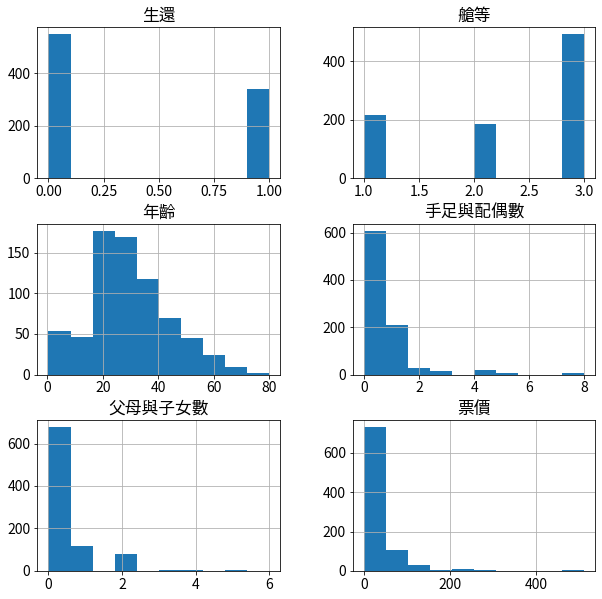

In [8]:
# 將要分析的項目繪製成圖形（數值項目）

# 定義數值項目
columns_n = ['生還', '艙等', '年齡', '手足與配偶數', '父母與子女數', '票價']

# 調整圖形的繪製區域
plt.rcParams['figure.figsize'] = (10, 10)

# 將資料框的數值項目繪製成直方圖
df_titanic[columns_n].hist()
plt.show()

#### 繪製圖形 (非數值項目)

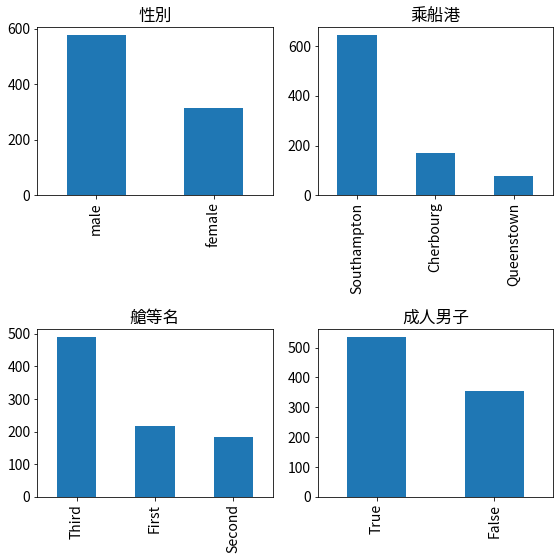

In [9]:
# 將要分析的項目繪製成圖形（非數值項目）

# 定義要繪製成圖形的行
columns_c = ['性別', '乘船港', '艙等名', '成人男子']

# 調整圖形的繪製區域
plt.rcParams['figure.figsize'] = (8, 8)

# 利用迴圈來繪製直方圖
for i, name in enumerate(columns_c):
    ax = plt.subplot(2, 2, i+1)
    df_titanic[name].value_counts().plot(kind='bar', title=name, ax=ax)
    
# 調整版面    
plt.tight_layout() 
plt.show()

### 4.1.2 視覺化的分析與確認方法

#### 載入鳶尾花資料集

#### 鳶尾花資料集的各項目

**萼片長度**(sepal_length)  
**萼片寬度**(sepal_width)  
**花瓣長度**(petal_length)  
**花瓣寬度**(petal_width)  
  
**品種**(species):  versicolor/setosa/virginica

In [10]:
# 匯入追加的函式庫
import seaborn as sns

# 載入範例資料
df_iris = sns.load_dataset("iris")

# 項目名稱中文化
columns_i = ['萼片長度', '萼片寬度', '花瓣長度', '花瓣寬度', '品種']
df_iris.columns = columns_i

# 資料內容
display(df_iris.head())

,萼片長度,萼片寬度,花瓣長度,花瓣寬度,品種
0,5.1000,3.5000,1.4000,0.2000,setosa
1,4.9000,3.0000,1.4000,0.2000,setosa
2,4.7000,3.2000,1.3000,0.2000,setosa
3,4.6000,3.1000,1.5000,0.2000,setosa
4,5.0000,3.6000,1.4000,0.2000,setosa


#### 繪製散佈圖

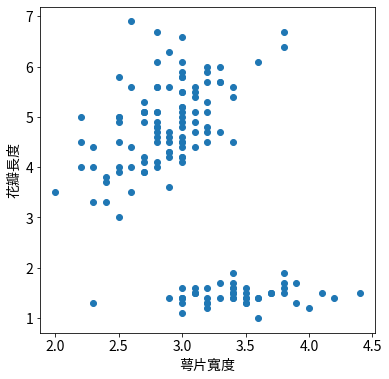

In [11]:
# 繪製散佈圖 matplotlib 版

# 調整圖形的繪製區域
plt.figure(figsize=(6,6))

# 繪製散佈圖
plt.scatter(df_iris['萼片寬度'], df_iris['花瓣長度'])

# 顯示標籤
# sepal 萼片 petal 花瓣
plt.xlabel('萼片寬度')
plt.ylabel('花瓣長度')
plt.show()

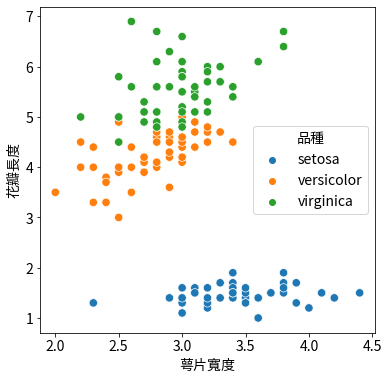

In [12]:
# 繪製散佈圖 seaborn 版（1）

plt.figure(figsize=(6,6))
sns.scatterplot(x='萼片寬度', y='花瓣長度', hue='品種', s=70,
    data=df_iris)
plt.show()

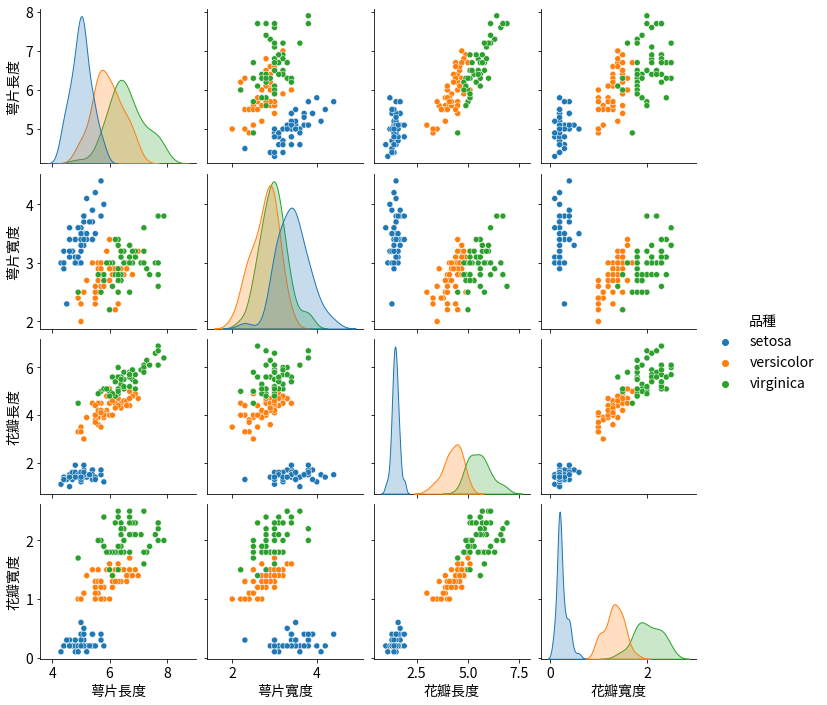

In [24]:
# 同時繪製所有散佈圖

sns.pairplot(df_iris, hue="品種")
plt.show()

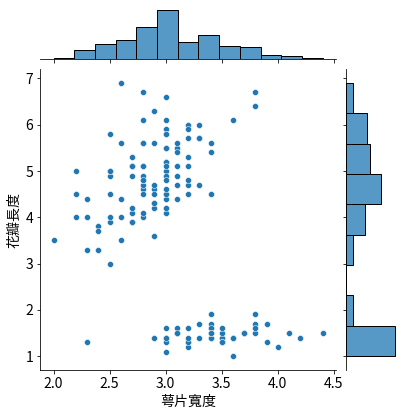

In [14]:
# 繪製散佈圖 seaborn 版（2）

sns.jointplot('萼片寬度', '花瓣長度', data=df_iris)
plt.show()

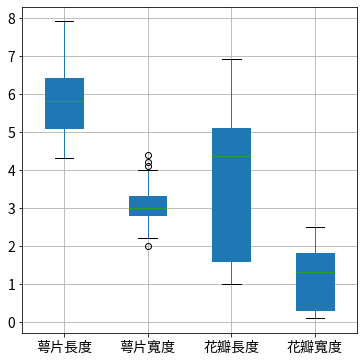

In [15]:
# 繪製盒鬚圖 matplotlib 版

# 調整圖形的繪製區域
plt.figure(figsize=(6,6))

# 繪製盒鬚圖
df_iris.boxplot(patch_artist=True)
plt.show()

In [16]:
# 利用 melt 函式進行資料的事前加工
w = pd.melt(df_iris, id_vars=['品種'])

# 確認加工結果
display(w.head())

,品種,variable,value
0,setosa,萼片長度,5.1000
1,setosa,萼片長度,4.9000
2,setosa,萼片長度,4.7000
3,setosa,萼片長度,4.6000
4,setosa,萼片長度,5.0000


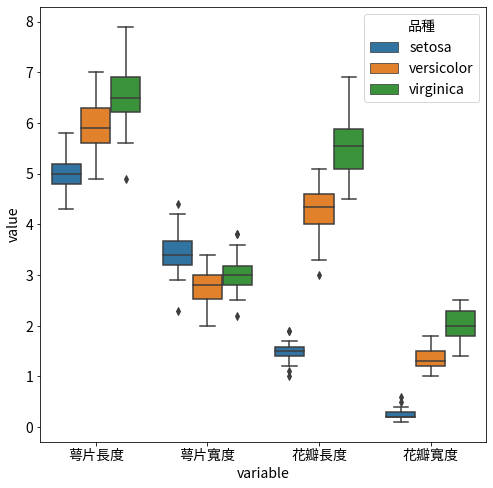

In [17]:
# 利用 seaborn 繪製盒鬚圖

# 增加 hue 參數，並根據鳶尾花的品種分別繪製盒鬚圖
plt.figure(figsize=(8,8))
sns.boxplot(x="variable", y="value", data=w, hue='品種')
plt.show()